# Analysing the Bible and the Quran using Spark

Tutorial: https://datascienceplus.com/analyzing-the-bible-and-the-quran-using-spark/ <br>
Bible text: http://www.gutenberg.org/files/10/10.txt <br>
Quran text: http://www.gutenberg.org/files/2800/2800.txt

In [1]:
from pyspark import SparkContext, SparkConf

conf = SparkConf().setAppName('miniProject').setMaster('local[*]')
sc = SparkContext.getOrCreate(conf)

In [2]:
# create resilient distributed datasets (RDDs)
bibleRDD = sc.textFile('bible.txt')
quranRDD = sc.textFile('quran.txt')

In [3]:
bibleRDD.sample(withReplacement = False, fraction = 0.0002, seed = 80).collect()

['',
 'numbered of them by their families were two thousand seven hundred and',
 '',
 '12:1 And Miriam and Aaron spake against Moses because of the Ethiopian',
 'kept themselves at least from women.',
 '13:39 And the soul of king David longed to go forth unto Absalom: for',
 '24:2 For the king said to Joab the captain of the host, which was with',
 'will do: but this thing I may not do. And the messengers departed, and',
 'that he rent his clothes, and said, Am I God, to kill and to make',
 'house of the LORD.',
 'perfect gold; 4:22 And the snuffers, and the basons, and the spoons,',
 '',
 '',
 '',
 '43:6 And I heard him speaking unto me out of the house; and the man',
 'will not accept them: neither will I regard the peace offerings of',
 '',
 'sea; it shall be done.',
 '24:12 Then arose Peter, and ran unto the sepulchre; and stooping down,',
 '',
 '11:14 The second woe is past; and, behold, the third woe cometh',
 '']

In [4]:
quranRDD.sample(withReplacement = False, fraction = 0.0002, seed = 80).collect()

['Many of them suffered torture for their faith in him, and two of them died as',
 'when ye halt; and from their wool and soft fur and hair, hath He supplied you',
 'meet for their best deeds.',
 '',
 'and those who were before you: haply ye will fear Him']

In [5]:
print('The number of lines in the Bible text file is {}'.format(bibleRDD.count()))
print('The number of lines in the Quran text file is {}'.format(quranRDD.count()))

The number of lines in the Bible text file is 100222
The number of lines in the Quran text file is 27320


In [6]:
import re

def wordclean(x):
    return re.sub('[^a-zA-Z0-9\s]+', '', x).lower().strip()

In [7]:
# check function
x = [" The Sun rises in the East and sets in the West!\n "
     "  He said, 'I am sure you know the answer!\n'  "]

for i in x: 
  print(wordclean(i))

the sun rises in the east and sets in the west
   he said i am sure you know the answer


In [8]:
bibleRDDList = bibleRDD.map(lambda x : wordclean(x))
quranRDDList = quranRDD.map(lambda x : wordclean(x))

In [9]:
bibleRDDList.take(60)[41:]

['',
 '12 and the earth was without form and void and darkness was upon',
 'the face of the deep and the spirit of god moved upon the face of the',
 'waters',
 '',
 '13 and god said let there be light and there was light',
 '',
 '14 and god saw the light that it was good and god divided the light',
 'from the darkness',
 '',
 '15 and god called the light day and the darkness he called night',
 'and the evening and the morning were the first day',
 '',
 '16 and god said let there be a firmament in the midst of the waters',
 'and let it divide the waters from the waters',
 '',
 '17 and god made the firmament and divided the waters which were',
 'under the firmament from the waters which were above the firmament',
 'and it was so']

In [10]:
quranRDDList.take(450)[414 : ]

['mohammed was born at mecca in ad 567 or 569  his flight hijra to medina',
 'which marks the beginning of the mohammedan era took place on 16th june 622',
 'he died on 7th june 632',
 '',
 '',
 '',
 'introduction',
 '',
 'the koran admittedly occupies an important position among the great religious',
 'books of the world though the youngest of the epochmaking works belonging',
 'to this class of literature it yields to hardly any in the wonderful effect',
 'which it has produced on large masses of men it has created an all but new',
 'phase of human thought and a fresh type of character it first transformed a',
 'number of heterogeneous desert tribes of the arabian peninsula into a nation',
 'of heroes and then proceeded to create the vast politicoreligious',
 'organisations of the muhammedan world which are one of the great forces with',
 'which europe and the east have to reckon today',
 '',
 'the secret of the power exercised by the book of course lay in the mind',
 'which produced

In [11]:
bibleRDDwords = bibleRDDList.flatMap( lambda x: x.split(" "))
quranRDDwords = quranRDDList.flatMap( lambda x: x.split(" "))

In [12]:
bibleRDDwords.sample(withReplacement = False, fraction = 0.00001, seed = 90).collect()

['and', 'beyond', 'the', 'went', 'destroyed', 'thou', 'it', 'i']

In [13]:
quranRDDwords.sample(withReplacement = False, fraction = 0.00005, seed = 90).collect()

['by', 'who', 'in', 'unto', 'drowned', 'the', 'to', 'and', 'loan', 'of']

In [15]:
bibleRDDwords.count()

851189

In [16]:
quranRDDwords.count()

217228

In [17]:
#remove spaces
bibleRDDwords = bibleRDDwords.filter(lambda x: len(x) != 0)
quranRDDwords = quranRDDwords.filter(lambda x: len(x) != 0)

In [18]:
bibleRDDwords.count()

824128

In [19]:
quranRDDwords.count()

207639

In [20]:
bibleRDDwordPairs =  bibleRDDwords.map(lambda x: (x,1))
quranRDDwordPairs =  quranRDDwords.map(lambda x: (x,1))

In [23]:
bibleRDDwordPairs.take(10)

[('the', 1),
 ('project', 1),
 ('gutenberg', 1),
 ('ebook', 1),
 ('of', 1),
 ('the', 1),
 ('king', 1),
 ('james', 1),
 ('bible', 1),
 ('this', 1)]

In [24]:
quranRDDwordPairs.take(10)

[('the', 1),
 ('project', 1),
 ('gutenberg', 1),
 ('etext', 1),
 ('of', 1),
 ('the', 1),
 ('koran', 1),
 ('as', 1),
 ('translated', 1),
 ('by', 1)]

In [25]:
bibleRDDwordCount =  bibleRDDwordPairs.reduceByKey(lambda a, b : a + b)
quranRDDwordCount =  quranRDDwordPairs.reduceByKey(lambda a, b : a + b)

In [26]:
bibleRDDwordCount.take(10)

[('project', 88),
 ('gutenberg', 31),
 ('ebook', 11),
 ('of', 34789),
 ('king', 2264),
 ('james', 51),
 ('bible', 8),
 ('this', 2833),
 ('is', 7014),
 ('use', 46)]

In [27]:
quranRDDwordCount.take(10)

[('project', 38),
 ('gutenberg', 25),
 ('of', 7037),
 ('as', 1113),
 ('translated', 13),
 ('rodwell', 11),
 ('copyright', 9),
 ('are', 1242),
 ('world', 88),
 ('sure', 23)]

In [28]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dannie/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
len(stopwords)

179

In [30]:
stopwords[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [31]:
bibleRDD_wc_filt = bibleRDDwordCount.filter(lambda x : x[0] not in stopwords)
quranRDD_wc_filt = quranRDDwordCount.filter(lambda x : x[0] not in stopwords)

In [32]:
bibleRDD_wc_filt.takeOrdered(10, lambda x : -x[1])

[('shall', 9840),
 ('unto', 8997),
 ('lord', 7830),
 ('thou', 5474),
 ('thy', 4600),
 ('god', 4442),
 ('said', 3999),
 ('ye', 3983),
 ('thee', 3826),
 ('upon', 2750)]

In [33]:
quranRDD_wc_filt.takeOrdered(10, lambda x : -x[1])

[('god', 3180),
 ('shall', 2331),
 ('ye', 1798),
 ('hath', 951),
 ('lord', 921),
 ('said', 894),
 ('thou', 813),
 ('say', 758),
 ('thee', 640),
 ('day', 535)]

In [35]:
unique_words_bible = bibleRDD_wc_filt.count()
unique_words_quran = quranRDD_wc_filt.count()
print(" The total number of unique words in the bible is {} while the unique number of words in the Quran is {}".\
      format(unique_words_bible, unique_words_quran ))

 The total number of unique words in the bible is 16814 while the unique number of words in the Quran is 12551


In [36]:
total_words_bible = bibleRDD_wc_filt.map(lambda a: a[1]).reduce(lambda a, b : a + b)
print("Total number of words in the Bible: {}".format(total_words_bible))

Total number of words in the Bible: 407741


In [37]:
total_words_quran = quranRDD_wc_filt.map(lambda a: a[1]).reduce(lambda a, b : a + b)
print("Total number of words in the Quran: {}".format(total_words_quran))

Total number of words in the Quran: 100096


In [38]:
Average_word_count_bible = total_words_bible/unique_words_bible
Average_word_count_quran = total_words_quran/unique_words_quran
print('Average word frequency in the Bible is  {} while the average word frequency in the Quran is {}'.\
      format(round(Average_word_count_bible,1), round(Average_word_count_quran,1)))

Average word frequency in the Bible is  24.3 while the average word frequency in the Quran is 8.0


In [39]:
import numpy as np

In [47]:
# take word frequencies into numpy arrays
bibleRDD_wc_value = bibleRDD_wc_filt.map(lambda x : x[1]).collect()
quranRDD_wc_value = quranRDD_wc_filt.map(lambda x : x[1]).collect()

In [48]:
bibleRDD_wc_value[:10]

[88, 31, 11, 2264, 51, 8, 46, 5, 2, 2]

In [49]:
quranRDD_wc_value[:10]

[38, 25, 13, 11, 9, 88, 23, 3, 17, 1]

In [50]:
bibleRDD_wc_np = np.array(bibleRDD_wc_value)
quranRDD_wc_np = np.array(quranRDD_wc_value)

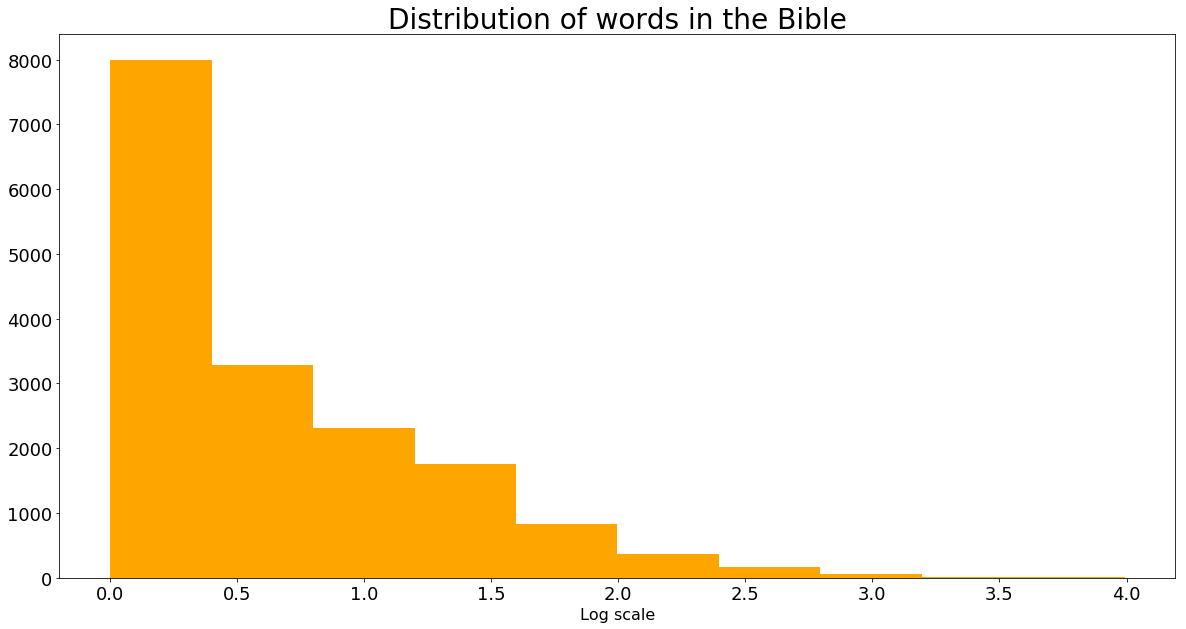

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (20, 10))
plt.hist(np.log10(bibleRDD_wc_np), color = "orange")
plt.title("Distribution of words in the Bible", fontsize = 28)
plt.xlabel("Log scale", fontsize = 16)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.show()

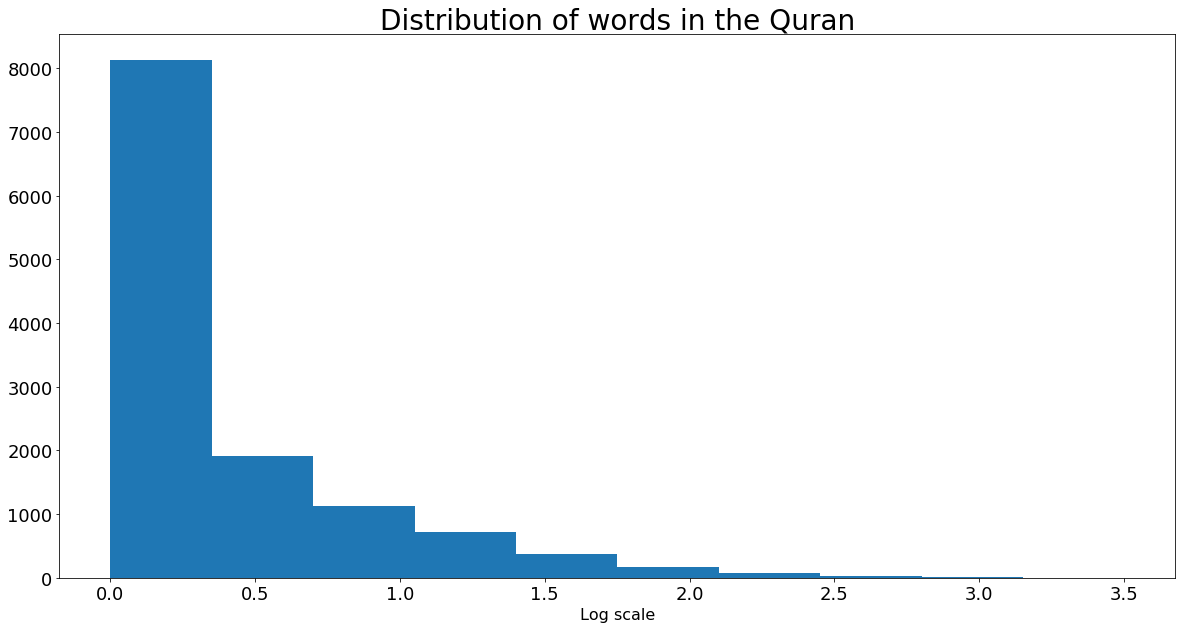

In [53]:
plt.figure(figsize = (20, 10))
plt.hist(np.log10(quranRDD_wc_np))
plt.title("Distribution of words in the Quran", fontsize = 28)
plt.xlabel("Log scale", fontsize = 16)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.show()

In [54]:
# create a dataframe using the top 15 most common words
import pandas as pd

bible_top15_words = bibleRDD_wc_filt.takeOrdered(15, lambda x : -x[1])
quran_top15_words = quranRDD_wc_filt.takeOrdered(15, lambda x : -x[1])
bible_words = [x[0] for x in bible_top15_words]
bible_count = [x[1] for x in bible_top15_words]
bible_dict = {"word": bible_words, "frequency": bible_count}

quran_words = [x[0] for x in quran_top15_words]
quran_count = [x[1] for x in quran_top15_words]
quran_dict = {"word": quran_words, "frequency": quran_count}

df_bible = pd.DataFrame(bible_dict)
df_quran = pd.DataFrame(quran_dict)

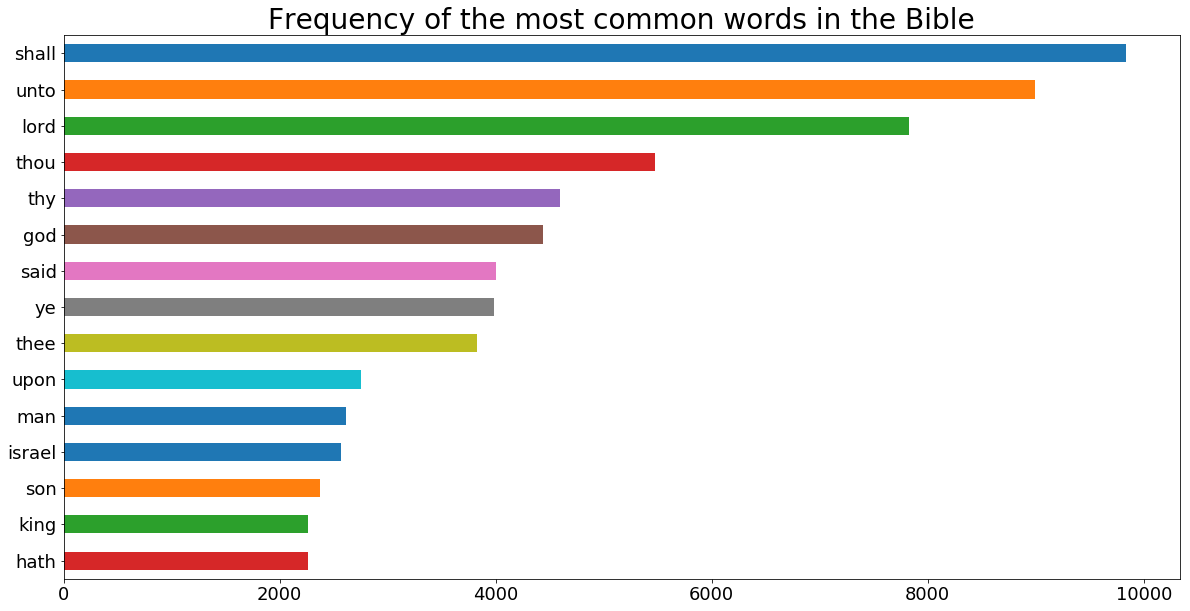

In [55]:
my_plot = df_bible.plot(figsize = (20, 10), 
              x = "word", y = "frequency", kind  = "barh", legend = False )
my_plot.invert_yaxis()
plt.title("Frequency of the most common words in the Bible", fontsize = 28)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.ylabel("")
plt.show()

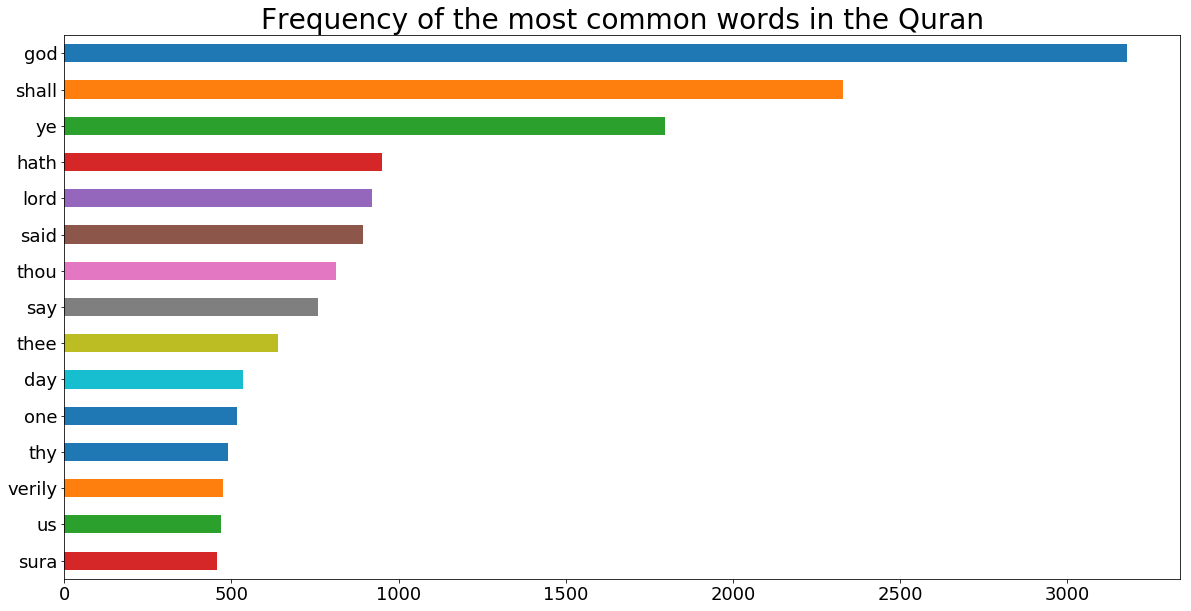

In [56]:
my_plot = df_quran.plot(figsize = (20, 10), 
              x = "word", y = "frequency", kind  = "barh", legend = False )
my_plot.invert_yaxis()
plt.title("Frequency of the most common words in the Quran", fontsize = 28)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.ylabel("")
plt.show()